# Анализ базы данных кино
## 1. Постановка задачи

Собрана база данных кино. В базе присутствуют столбцы с id, названия, дату релиза, описание, показы, средняя оценка, количество оценок и наличие видео. Всего собрано 9463 записи

Студии, которые могут стать заказчиками анализа:
- Walt Disney Company
- Базелевс
- Yellow, Black and White Group
- Paramount Pictures
- Кинокомпания СТВ

Возможные анализа:
1. Выявить среднюю разницу оценки первой и последующих частей фильмов
2. Определить, какие слова чаще встречаются в описании фильмов с высокой оценкой
3. Найти наиболее удачные года кинопроката
4. Обнаружить закономерности дат выпуска относительно среднего успеха фильмов"

In [ ]:
import pandas as pd
from datetime import date
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Паспорт датасета (Data Understanding)\n",
df = pd.read_csv('sample_data/Movie-Dataset-Latest.csv')
print('Размерность (строк, столбцов): ', df.shape)

print('Типы всех столлбцов:')
df.info()
print('Преобразуем данные')
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

Размерность (строк, столбцов):  (9463, 9)
Типы всех столлбцов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9463 non-null   int64  
 1   id            9463 non-null   int64  
 2   title         9463 non-null   object 
 3   release_date  9463 non-null   object 
 4   overview      9449 non-null   object 
 5   popularity    9463 non-null   float64
 6   vote_average  9463 non-null   float64
 7   vote_count    9463 non-null   int64  
 8   video         9463 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 600.8+ KB
Преобразуем данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    9463 non-null   int64         
 1   id   

In [ ]:
# 3. Аудит качества данных
print('Кол-во пустых значений')
print(df.isnull().sum())

print('Пустые значений от общего числа в процентах:')
print((df.isnull().sum()) / df.size * 100)

print('Количество дубликатов для каждой строки')
counts = Counter(df)
duplicates = {k: v for k, v in counts.items() if v > 1}
if duplicates is {}:
  print(duplicates)
else:
  print('Дубликатов нет')

Кол-во пустых значений
Unnamed: 0       0
id               0
title            0
release_date     0
overview        14
popularity       0
vote_average     0
vote_count       0
video            0
dtype: int64
Пустые значений от общего числа в процентах:
Unnamed: 0      0.000000
id              0.000000
title           0.000000
release_date    0.000000
overview        0.016438
popularity      0.000000
vote_average    0.000000
vote_count      0.000000
video           0.000000
dtype: float64
Количество дубликатов для каждой строки
Дубликатов нет


In [ ]:
print('Для оценки:')
print('Миниманое значение: ', df['vote_average'].min())
print('Максимальное значение: ', df['vote_average'].max())
print('Среднее арифметическое значение: ', df['vote_average'].mean().round(1))
print('Среднее квадратическое отклонение: ', np.std(df['vote_average'], ddof=1))

print('Для количество оценок фильма:')
print('Миниманое значение: ', df['vote_count'].min())
print('Максимальное значение: ', df['vote_count'].max())
print('Среднее арифметическое значение: ', df['vote_count'].mean().round(1))
print('Среднее квадратическое отклонение: ', np.std(df['vote_count'], ddof=1))

print('Проверим наличие невозможных значений (Из прошлых проверок очевидно, что оценки зажаты в пределах 2.2 и 8.7, а просмотры не отрицательны)')
if(df['vote_count'].min() < 0):
  print('Есть кол-во оценок меньше 0!')
else:
  print('Кол-во оценок не отрицательно')

Для оценки:
Миниманое значение:  2.2
Максимальное значение:  8.7
Среднее арифметическое значение:  6.6
Среднее квадратическое отклонение:  0.8194079511952477
Для количество оценок фильма:
Миниманое значение:  1902-04-17 00:00:00
Максимальное значение:  30535
Среднее арифметическое значение:  1515.0
Среднее квадратическое отклонение:  2555.328387224366
Проверим наличие невозможных значений (Из прошлых проверок очевидно, что оценки зажаты в пределах 2.2 и 8.7, а просмотры не отрицательны)
Кол-во оценок не отрицательно


Проверим среднюю оценку на выбросы с помощью IQR:
<bound method DataFrame.count of       Unnamed: 0      id                                  title release_date  \
9371        9371   15268  Street Fighter: The Legend of Chun-Li   2009-02-27   
9372        9372   35026                             Lucky Luke   2009-10-21   
9373        9373   59722                          2012: Ice Age   2011-06-27   
9374        9374   14324                       Virgin Territory   2007-12-17   
9375        9375  401546                             The Dinner   2017-05-05   
...          ...     ...                                    ...          ...   
9458        9458   13805                         Disaster Movie   2008-08-29   
9459        9459    5491                      Battlefield Earth   2000-05-12   
9460        9460   11059                      House of the Dead   2003-04-11   
9461        9461   14164                   Dragonball Evolution   2009-03-12   
9462        9462   40016             

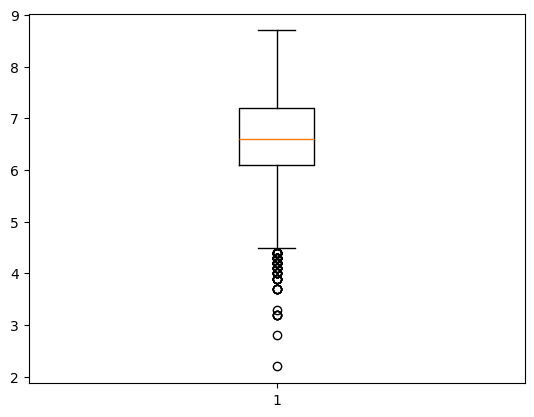

Для популярности:


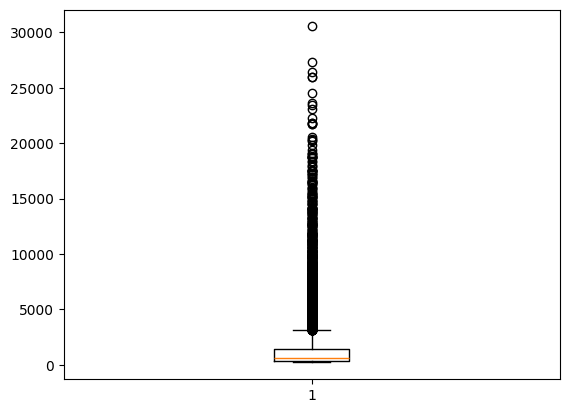

In [ ]:
print('Проверим среднюю оценку на выбросы с помощью IQR:')
Q1 = df['vote_average'].quantile(0.25)
Q2 = df['vote_average'].quantile(0.75)
IQR = Q2 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR
ejection = df[(df['vote_average'] < lower_bound) | (df['vote_average'] > upper_bound)]
ejection['vote_average'].sort_values()
print(ejection.count)

print('Проверим количество оценок на выбросы с помощью z-score:')

popul_mean = df['vote_count'].mean()
popul_aver_std = np.std(df['vote_count'], ddof=1)
print(popul_aver_std)
lower_bound = popul_mean - 3 * popul_aver_std
upper_bound = popul_mean + 3 * popul_aver_std
ejection = df[(df['vote_count'] < lower_bound) | (df['vote_count'] > upper_bound)]
ejection['vote_count'].sort_values()
print(ejection.count)

print('Изобразим также ящик с усами для этих же характеристик')
print('Для средней оценки:')
plt.boxplot(df['vote_average'])
plt.show()
print('Для популярности:')
plt.boxplot(df['vote_count'])
plt.show()

Гистограмма количества выпущенных фильмов по годам


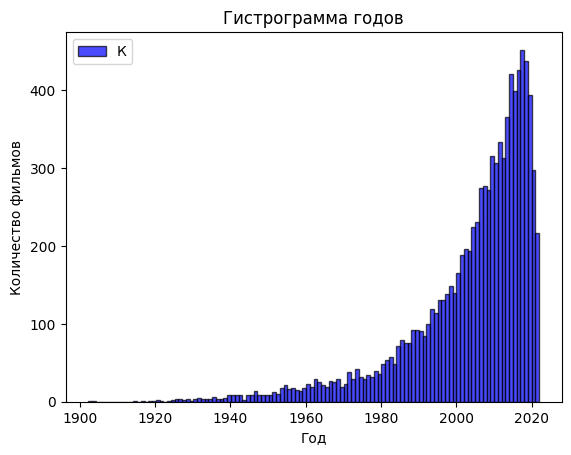


Видно, что больше всего было фильмов было в 2017 году. Более того, со временем количество фильмов увеличивалось. Рост с 1980 до 2000 в ~4 раза, а с 2000 до 2020 в ~3. В 2020 году произошла эпидемия и количество фильмов резко снизилось.

KDE график средних оценок фильмов


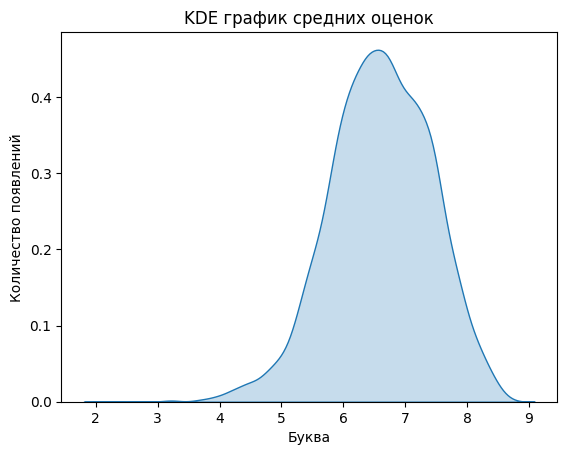

В чаще всего фильмы оцениваются в ~6,5/10. Количество оценок задерживается на уровне ~7,2/10, после чего рузко идут вниз. Также резкий подъем идет при оценках от ~5 до ~6 по десятибальной шкале


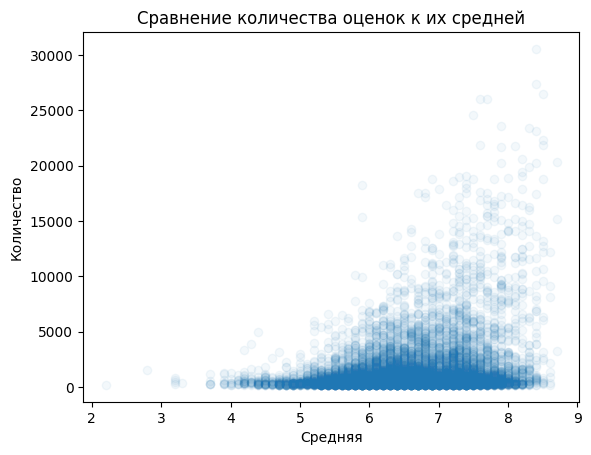

Можно сделать вывод, что чем выше оценивают фильм, тем больше его смотрят. Большую часть фильмов не получают больше, чем 5000 оценок. Оценки фильмов не превышают 30.000 (за 1 исключением)


In [ ]:
# Разведочный анализ
print('Гистограмма количества выпущенных фильмов по годам')
plt.hist(df['release_date'], bins=120, color='blue', edgecolor='black', alpha=0.7)
plt.title('Гистрограмма годов')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()
print('')
print('Видно, что больше всего было фильмов было в 2017 году. Более того, со временем количество фильмов увеличивалось. Рост в 2000 и 1980 имеет разницу в ~4 раза, а 2020 с 2000 в ~3. Возможно через 20 лет фильмы увеличаться в 2 раза. В 2020 году произошла эпидемия и количество фильмов резко снизилось. Как их снимали?')
print('')

print('KDE график средних оценок фильмов')
sns.kdeplot(df['vote_average'], fill=True)
plt.title('KDE график средних оценок')
plt.xlabel('Буква')
plt.ylabel('Количество появлений')
plt.show()
print('Чаще всего фильмы оцениваются в ~6,5/10. Количество оценок задерживается на уровне ~7/10, после чего резко идут вниз (возможно это потому, что в среднем люди колеблются между средней оценкой 5 и максимальная 10). Также резкий подъем идёт при оценках от ~5 до ~6 по десятибальной шкале. Оценок близких к 1 или 10 больше чем на 1-цу нет. По какой причине люди так не обваливают/высоко оценивают?')

plt.scatter(df['vote_average'], df['vote_count'], alpha=0.05)
plt.title('Сравнение количества оценок к их средней')
plt.xlabel('Средняя')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()
print('Можно сделать вывод, что чем выше оценивают фильм, тем больше его смотрят и оценивают. Большая часть фильмов не получают больше, чем 5000 оценок, что при учёте прошлого фактора заставляет задуматься о надежности высоких средних оценок при малом количестве оценок. Оценки фильмов не превышают 30.000 (за 1 исключением)')